In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import kstest_normal
from careful_split import careful_split
import numpy as np
import seaborn as sns

%matplotlib inline

# Hipóteses para Data Science

## Contexto

Cursos livres de dados (DS e DA).

## Hipóteses

Dado que as empresas citam frequentamente "ferramentas" ao invés de habilidades/competências, suspeito que os tópicos que envolvam explicitamente uma ferramenta têm maior relevância percebida pelo aluno e, possivelmente como consequência disso, apresenta maior aprendizagem percebida pelo aluno.

- Hipótese: componentes de aprendizagem relacionadas explicitamente com ferramentas apresentam relevância, conforme percebida pelo aluno, maior que as componentes relacionadas com habilidades/competências e conceituais.
- Hipótese: componentes de aprendizagem relacionadas explicitamente com ferramentas apresentam aprendizagem, conforme percebida pelo aluno, maior que as componentes relacionadas com habilidades/competências e conceituais.

In [2]:
ds = pd.read_csv('ds_tidy.csv', parse_dates=['date'])
ds.head()

,turma,date,student,topicos,component,relevance,learn,satisfaction,pace,tool,algorithm
0,6,2019-04-18,25,aplicações de clusterização de dados,Agrupamento,4,1,6,5,False,False
1,6,2019-04-18,25,MeanShift e DBSCAN,Agrupamento/Algoritmo/ML,4,2,6,5,False,True
2,6,2019-04-18,47,aplicações de clusterização de dados,Agrupamento,5,1,7,7,False,False
3,6,2019-04-18,47,MeanShift e DBSCAN,Agrupamento/Algoritmo/ML,5,2,7,7,False,True
4,6,2019-04-18,32,aplicações de clusterização de dados,Agrupamento,4,1,5,7,False,False


In [3]:
ds['lesson'] = ds.date.astype(str) + '/' + ds.turma.astype(str)

In [4]:
ds_1, ds_2 = careful_split(ds)

### Hipótese 1: ferramenta

A presença de ferramentas dentre os tópicos do componente aferam _positivamente_ (1) a relevância e (2) a aprendizagem percebidas pelo estudante.

In [5]:
ds_tools = ds_1[ds_1.tool]
ds_ntools = ds_1[~ds_1.tool]

In [6]:
l_bar = ds_tools.learn.mean()
l_std = ds_tools.learn.std()
n = len(ds_tools)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

232
1.3793103448275863
0.9816954360916479
0.128902925867864


In [7]:
l_bar = ds_ntools.learn.mean()
l_std = ds_ntools.learn.std()
n = len(ds_ntools)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

1531
1.2338340953625082
0.8640561717171505
0.04416562462057345


Text(0, 0.5, 'Ferramenta?')

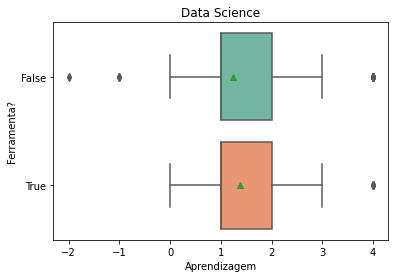

In [8]:
ax = sns.boxplot(x="learn", y="tool", orient="h", palette="Set2", showmeans=True, data=ds_1)
ax.set_title('Data Science')
ax.set_xlabel('Aprendizagem')
ax.set_ylabel('Ferramenta?')

#### Teste de normalidade

In [9]:
def interpret_ks_normality_test(ks_statistic, p_value):
    if p_value < 0.05:
        print(f'A distribuição NÃO é normal: p-valor = {p_value}')
    else:
        print(f'A distribuição é normal: p-valor = {p_value}')

In [17]:
ks_statistic, p_value = kstest_normal(ds_tools.learn)
interpret_ks_normality_test(ks_statistic, p_value)

A distribuição NÃO é normal: p-valor = 8.747659455420123e-39


In [18]:
ks_statistic, p_value = kstest_normal(ds_ntools.learn)
interpret_ks_normality_test(ks_statistic, p_value)

A distribuição NÃO é normal: p-valor = 7.5980341364196e-311


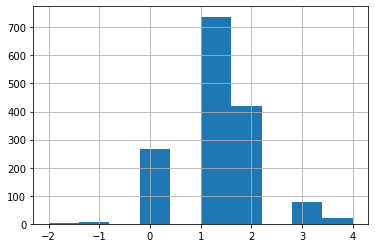

In [16]:
ds_ntools.learn.hist()

#### Teste t da hipótese

In [19]:
ttest_ind(ds_tools.learn, ds_ntools.learn, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=2.1352871701015634, pvalue=0.0335817456549418)

In [23]:
ttest_ind(ds_tools.relevance, ds_ntools.relevance, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.2784085788335642, pvalue=0.2020849283936786)

Os testes t de Welch para duas amostras com variâncias distintas mostra que tanto a relevância quando a aprendizagem não apresentam diferença estatísticamente significativa.

### Hipótese 2: algoritmo

A presença de algoritmos de _machine learning_ dentre os tópicos do componente afetam *positivamente* (1) a relevância e a (2) aprendizagem percebidas pelo estudante.

In [29]:
ds_alg = ds_1[ds_1.algorithm]
ds_nalg = ds_1[~ds_1.algorithm]

In [30]:
l_bar = ds_alg.learn.mean()
l_std = ds_alg.learn.std()
n = len(ds_alg)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

110
1.3454545454545455
0.8824108306575336
0.16826914307541718


In [31]:
l_bar = ds_nalg.learn.mean()
l_std = ds_nalg.learn.std()
n = len(ds_nalg)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

1653
1.2468239564428312
0.8813702138470156
0.04335627259715735


In [32]:
ttest_ind(ds_alg.relevance, ds_nalg.relevance, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.8320191832911045, pvalue=0.406942925113294)

In [33]:
ttest_ind(ds_alg.learn, ds_nalg.learn, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=1.1352182096547545, pvalue=0.25847490141300605)

Text(0, 0.5, 'Algoritmo?')

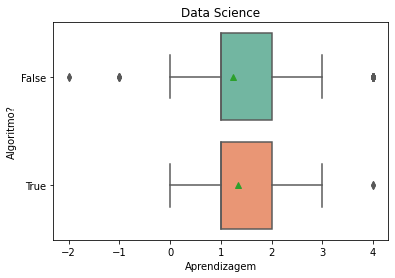

In [34]:
ax = sns.boxplot(x="learn", y="algorithm", orient="h", palette="Set2", showmeans=True, data=ds_1)
ax.set_title('Data Science')
ax.set_xlabel('Aprendizagem')
ax.set_ylabel('Algoritmo?')

Para a aprendizagem, o valor $p$ é inferior ao limite de 5% de significância. Isso indica que a diferença entre as médias na aprendizagem, num conjunto e no outro, é estatisticamente significativa. Como resultado, nossos dados fornecem informações suficientes para concluirmos que a aprendizagem é (positivamente) afetada pela presença de algoritmos.

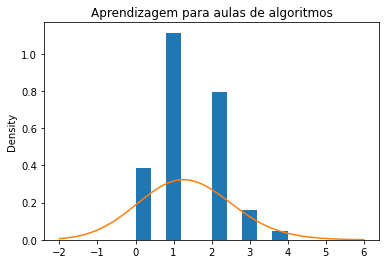

In [35]:
ds_alg.learn.hist(density=True)
ds_alg.learn.plot.kde(bw_method=1)
plt.title("Aprendizagem para aulas de algoritmos");

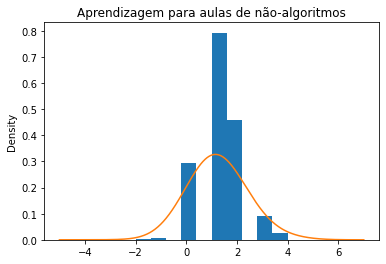

In [36]:
ds_nalg.learn.hist(density=True)
ds_nalg.learn.plot.kde(bw_method=1)
plt.title("Aprendizagem para aulas de não-algoritmos");

# Hipóteses para Data Analytics

In [20]:
da = pd.read_csv('da_tidy.csv', parse_dates=['date'])
da.head()

,turma,date,student,topicos,component,relevance,learn,satisfaction,pace,tool,algorithm
0,2,2019-04-18,426,como capturar os dados (fontes de dados),Fontes de dados,5,1,6,5,False,False
1,2,2019-04-18,426,web scrapping,Fontes de dados,5,2,6,5,False,False
2,2,2019-04-18,426,fórmulas avançadas (IF. VLOOKUP. COUNTIFS. SUM...,Ferramenta,5,1,6,5,True,False
3,2,2019-04-18,426,lógica de programação,Lógica/Programação,5,1,6,5,False,False
4,2,2019-04-18,438,como capturar os dados (fontes de dados),Fontes de dados,5,4,10,10,False,False


In [21]:
da['lesson'] = da.date.astype(str) + '/' + da.turma.astype(str)

In [22]:
da_1, da_2 = careful_split(da)

### Hipótese 1: ferramenta

In [23]:
da_tools = da_1[da_1.tool]
da_ntools = da_1[~da_1.tool]

In [24]:
l_bar = da_tools.learn.mean()
l_std = da_tools.learn.std()
n = len(da_tools)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

408
1.8970588235294117
1.1450958036250478
0.11338137964322414


In [25]:
l_bar = da_ntools.learn.mean()
l_std = da_ntools.learn.std()
n = len(da_ntools)

print(n)
print(l_bar)
print(l_std)
print(2 * l_std/np.sqrt(n))

1470
1.5462585034013605
1.0656958154085898
0.05559101309887107


Text(0, 0.5, 'Ferramenta?')

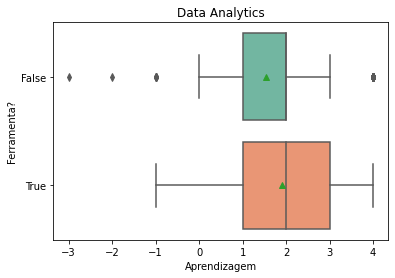

In [26]:
ax = sns.boxplot(x="learn", y="tool", orient="h", palette="Set2", showmeans=True, data=da_1)
ax.set_title('Data Analytics')
ax.set_xlabel('Aprendizagem')
ax.set_ylabel('Ferramenta?')

In [27]:
ttest_ind(da_tools.learn, da_ntools.learn, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=5.556076407480063, pvalue=4.1086992983044005e-08)

O teste t acima indica que de fato a percepção de aprendizagem para tópicos referentes a ferramentas, no curso de Data Analytics, é maior que nas aulas que não referem-se explicitamente a ferramentas. Vamos comparar os histogramas de cada caso, bem como uma estimativa da distribuição de probabilidade.

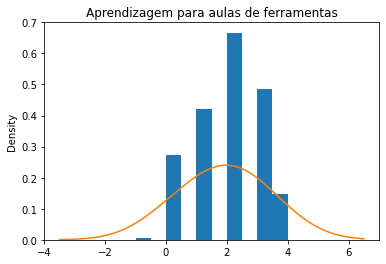

In [28]:
da_tools.learn.hist(density=True)
da_tools.learn.plot.kde(bw_method=1)
plt.title("Aprendizagem para aulas de ferramentas");

In [ ]:
da_ntools.learn.hist(density=True)
da_ntools.learn.plot.kde(bw_method=1)
plt.title("Aprendizagem para aulas conceituais");

### Hipótese 2: relevância

A relevância média percebida pelo aluno é maior quando o componente de aprendizagem refere-se explicitamente a alguma ferramenta.

In [ ]:
ttest_ind(da_tools.relevance, da_ntools.relevance, equal_var=False, nan_policy='omit')

In [ ]:
da_tools.relevance.hist(density=True)
da_tools.relevance.plot.kde(bw_method=1)
plt.title("Relevância para aulas de ferramentas");

In [ ]:
da_ntools.relevance.hist(density=True)
da_ntools.relevance.plot.kde(bw_method=1)
plt.title("Relevância para aulas conceituais");

In [37]:
len(da[da.algorithm])

0